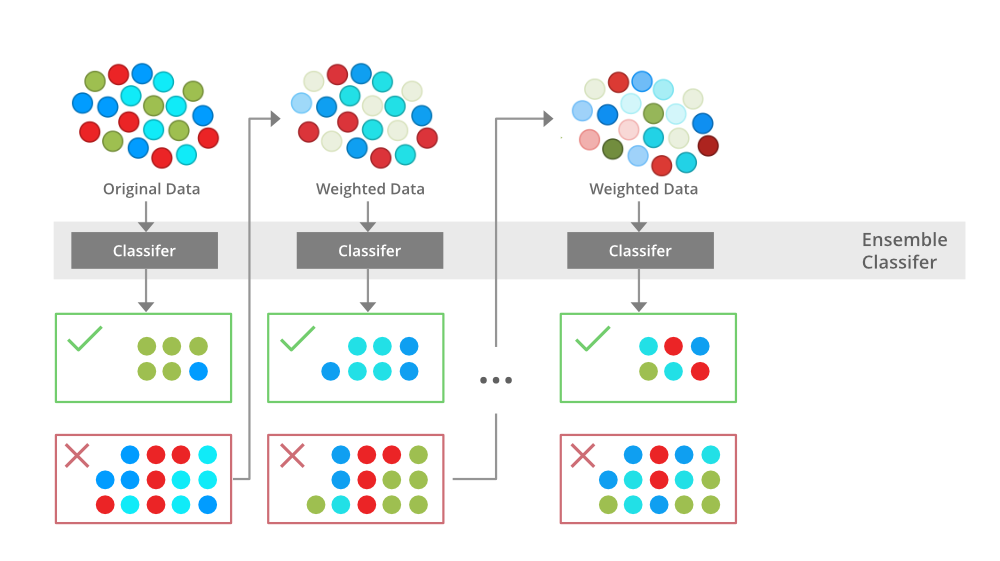

### **Step 1 – Initialize the weights**

For a dataset with N training data points instances, initialize N \( W_{i} \) weights for each data point with 

$$  W_{i} = \frac{1}{N}  $$

### **Step 2 – Train weak classifiers**

Train a weak classifier \( M_k \) where \( k \) is the current iteration. The weak classifier we are training should have an accuracy greater than 0.5, which means it should be performing better than a naive guess.

### **Step 3 – Calculate the error rate and importance of each weak model \( M_k \)**

Calculate rate error_rate for every weak classifier \( M_k \) on the training dataset.

Calculate the importance of each model \( \alpha_k \) using the formula: 

$$ Amount-of-Say (\alpha_k) = \frac{1}{2} \ln{\frac{1 - \text{error}_k}{\text{error}_k}} $$


### **Step 4 – Update data point weight for each data point \( W_i \)**

After applying the weak classifier model to the training data, we will update the weight for incorrectly classified and correctly classified datapoints.

**1. For incorrectly classified data :**

$$ W_{\text{new}} = W_{\text{old}} \times e^{\alpha_k} $$

**2. For correctly classified data :**

$$ W_{\text{new}} = W_{\text{old}} \times e^{-\alpha_k} $$


Here \( y_i \) is the true output and \( x_i \) is the corresponding input vector.

### **Step 5 – Normalize the Instance weight**

We will normalize the instance weight so that they can be summed up to 1 using the formula:

$$ W_i = \frac{W_i}{\sum(W)} $$


### **Step 6 – Make the Distribution Range [0,1] and Generate Random Number to pick points:**

**1. First, an empty dataset of the same size as the original dataset is created. by adding new weights make a distribution which ranges = [0,1]**

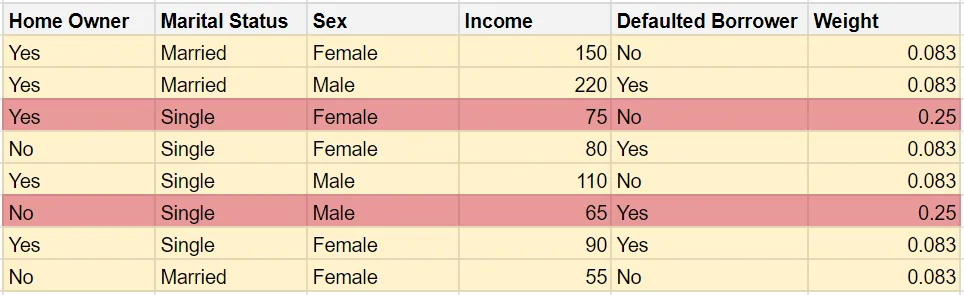 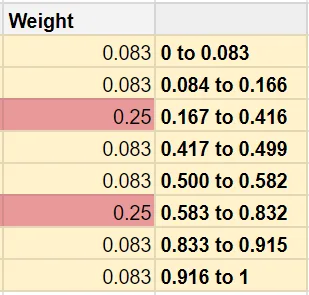

**2. generate a random number b/w [0,1] and check where it lies.**

**3. pick that point and make the new dataset**

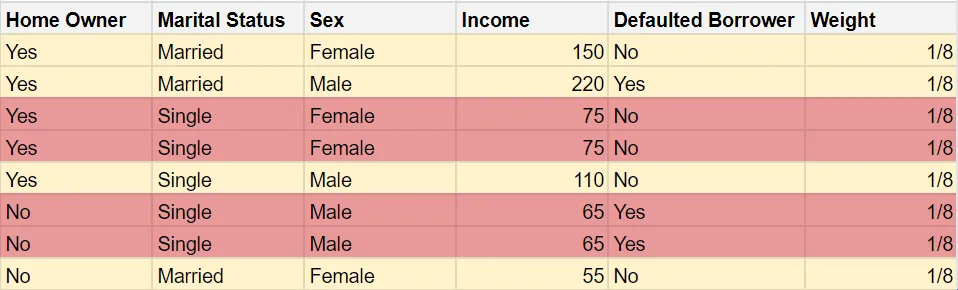

**4. again make $$ initial-weights = W_{i} = \frac{1}{N}  $$**


### **Step 7 – Repeat steps 1-6 for \( K \) iterations**


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [2]:
X,y = load_breast_cancer(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((398, 30), (171, 30))

```
class sklearn.ensemble.AdaBoostClassifier(estimator=None,
                                          n_estimators=50, 
                                          learning_rate=1.0, 
                                          algorithm='SAMME.R', 
                                          random_state=None)
```

### **Hyper-parameter Tuning**


**1. base_estimator:** The model to the ensemble, the default is a decision tree.

**2. n_estimators:** Number of models to be built.

**3. learning_rate:** shrinks the contribution of each classifier by this value.

**4. random_state:** The random number seed, so that the same random numbers generated every time.


**estimatorobject, default=None**

The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is **DecisionTreeClassifier initialized with max_depth=1.**

In [5]:
clf = AdaBoostClassifier(random_state=42)

In [6]:
clf.fit(X_train,y_train)

c:\Users\sushovan.saha\AppData\Local\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [7]:
clf.score(X_test,y_test)

0.9766081871345029

In [10]:
clf2 = AdaBoostClassifier(random_state=42,
                          estimator=RandomForestClassifier(random_state=42),
                          n_estimators=100,
                          learning_rate=0.01)

In [11]:
clf2.fit(X_train,y_train)

c:\Users\sushovan.saha\AppData\Local\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   learning_rate=0.01, n_estimators=100, random_state=42)

In [12]:
clf2.score(X_test,y_test)

0.9707602339181286

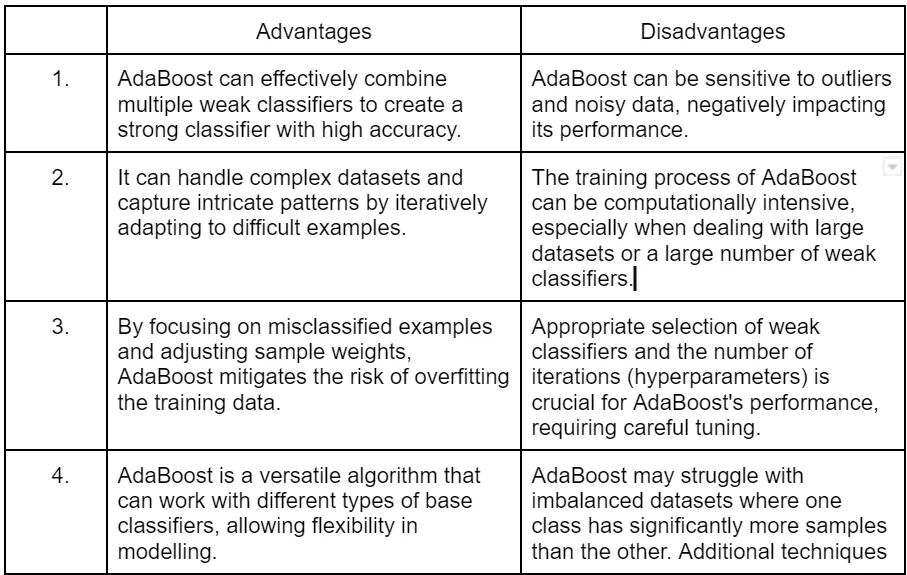